In this notebook, we play a bit with the visualization and sampling of a Gaussian mixture. We first sample from a two-dimensional Gaussian mixture. But before we start, we need to import a few packages and define some helper functions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

##############################################
# Draw from a finite distribution defined
# by a vector p with elements adding up
# to one. We return a number between
# 1 and the number of elements of p
# and i is returned with probability p[i-1]
##############################################
def draw(p):
    u = np.random.uniform()
    x = 0
    n = 1
    for i in p:
        x = x + i
        if x >= u:
            return n
        n += 1
    return i

In [2]:
#############################################
#
# Utility function to create a sample
#
# This will create a sample of data points
# distributed over K clusters. The sample
# will have size points. 
# The clusters are Gaussian normal 
# distributions with the given centres
# and standard deviations
# 
# The centre points are assumed to be given
# as a matrix with K rows. The vector p is 
# a vector with non-negative elements that
# sum up to one 
# 
# Returns the sample and the true cluster
#############################################

def get_sample(M, p, cov, size=10):
    #
    # Number of clusters
    #
    X = []
    T = []
    for i in range(size):
        k = draw(p) - 1
        T.append(k)
        #
        # Then draw from the normal distribution with mean M[k,:]
        #
        rv = scipy.stats.multivariate_normal(mean=M[k], cov=cov[k])
        _X = [rv.rvs()]
        X.append(_X)
    return np.concatenate(X), T

#############################################
#
# Plot a distribution
#
#############################################
def plot_clusters(S, T, axis):
    for i in range(S.shape[0]):
        x = S[i,0]
        y = S[i,1]
        if T[i] == 0:
            axis.plot([x],[y],marker="o", color="red")
        else:
            axis.plot([x],[y],marker="o", color="blue")

In [3]:
_M = np.array([[5,1], [1,4]])
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(1,2,2)
S, T = get_sample(_M,p=[0.5, 0.5], size=200, cov=[[0.5, 0.5], [0.5,0.5]])

In [4]:
plot_clusters(S,T, ax1)

Now let us try something else. We sample from a one-dimensional distribution and create a histogramm

In [5]:
_M = np.array([2, -3])
ax2 = fig.add_subplot(1,2,1)
cov = [0.5, 0.5]
p = [0.7, 0.3]
S, T = get_sample(_M,p=p, size=500, cov=cov)
ax2.hist(S, 100, rwidth=0.8, normed=True);
x = np.arange(-5, 5, 0.1)
for k in range(2):
    pdf = p[k]*scipy.stats.norm.pdf(x, loc=_M[k], scale=cov[k])
    ax2.plot(x, pdf, "g")


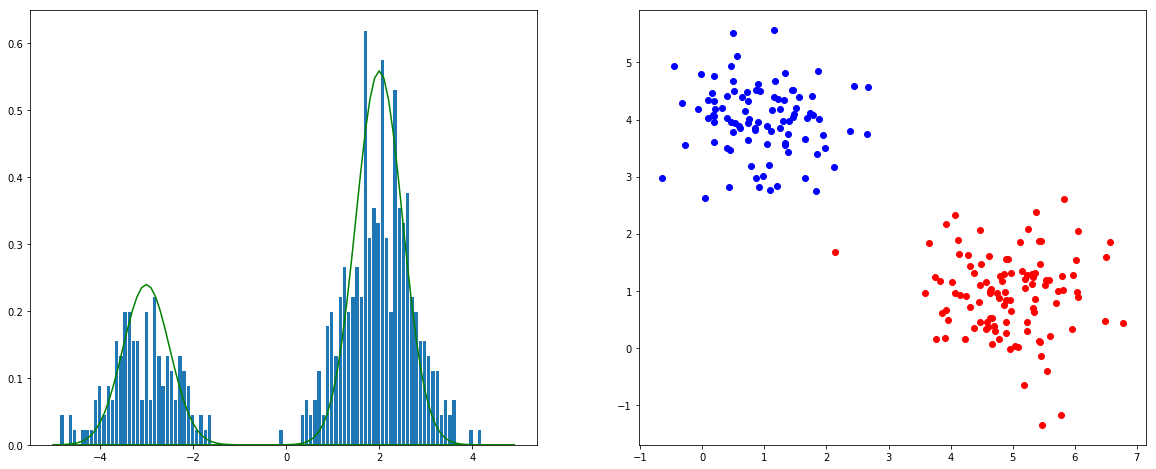

In [6]:
plt.savefig("/tmp/GaussianMixture.png")
plt.show()